# Assignment 1

This code tests your installation of OpenCV in python and of pyOpenGL.

## Test of OpenCV library - cv2

This is a modified version of the OpenCV calibration tutorial

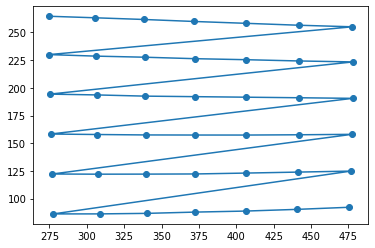

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Object coordinates
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store image points.
imgp = [] # 2d points in image plane.

# Read image
img = cv2.imread('left1.jpg')

# Command #1
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Command #2
ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

# Termination criteria for Command 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# Command #3
cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
imgp.append(corners)

# Command #4
cv2.drawChessboardCorners(img, (7,6), corners,ret)

xs = []
ys = []
for i in range(len(imgp[0])):
    for x, y in imgp[0][i]:
        xs.append(x)
        ys.append(y)

plt.figure()
plt.plot(xs, list(reversed(ys)), "o-")
plt.show()

# Image display with its points
cv2.namedWindow('Test calibration')
cv2.startWindowThread()
cv2.imshow('Test calibration',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Test of OpenGL library - pyOpenGL

This is a modified version of the NeHe's gamedev tutorial for OpenGL

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *
import sys

# Enter here the binary command that is read when you type ESC
ESCAPE = b'\x1b'

# Number of the glut window.
window = 0

# A general OpenGL initialization function.  Sets all of the initial parameters. 
def InitGL(Width, Height):            # We call this right after our OpenGL window is created.
    glClearColor(1.0, 0.0, 1.0, 0.0)  # Background color
    glClearDepth(1.0)                 # Enables Clearing Of The Depth Buffer
    glDepthFunc(GL_LESS)              # The Type Of Depth Test To Do
    glEnable(GL_DEPTH_TEST)           # Enables Depth Testing
    glShadeModel(GL_SMOOTH)           # Enables Smooth Color Shading

    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()# Reset The Projection Matrix
    # Calculate The Aspect Ratio Of The Window
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)

    glMatrixMode(GL_MODELVIEW)

# The function called when our window is resized (it should not be called if full screen option is chosen)
def resize_scene(Width, Height):
    if Height == 0:                   # Prevent A Divide By Zero If The Window Is Too Small 
        Height = 1

    glViewport(0, 0, Width, Height)   # Reset The Current Viewport And Perspective Transformation
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)
    glMatrixMode(GL_MODELVIEW)

# The main drawing function. 
def draw():
    # Clear The Screen And The Depth Buffer
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glLoadIdentity()# Reset The View 

    # # Move Left 1.5 units and into the screen 6.0 units.
    # glTranslatef(0.0, 0.0, -6.0)

    # # Draw
    # glBegin(GL_POLYGON)                 # Start drawing a polygon
    # glVertex3f(0.0, 1.0, 0.0)           # Top
    # glVertex3f(1.0, -1.0, 0.0)          # Bottom Right
    # glVertex3f(-1.0, -1.0, 0.0)         # Bottom Left
    # glEnd()                             # We are done with the polygon

    #  since this is double buffered, swap the buffers to display what just got drawn. 
    glutSwapBuffers()

# The function called whenever a key is pressed. Note the use of Python tuples to pass in: (key, x, y)  
def key_pressed(key, x, y):
    if key == ESCAPE:
        glutLeaveMainLoop()
        return

def main():
    global window
    # Start glut with empty argument
    glutInit(())

    # Select type of Display mode:   
    # Double buffer 
    # RGBA color
    # Alpha components supported 
    # Depth buffer
    glutInitDisplayMode(GLUT_RGBA | GLUT_DOUBLE | GLUT_ALPHA | GLUT_DEPTH)
    
    # Window size
    glutInitWindowSize(540, 480)
    
    # the window starts at the upper left corner of the screen 
    glutInitWindowPosition(0, 0)

    # Create a window with GLUT.
    window = glutCreateWindow(b"Assignment 1 - pyOpenGL")
    # Binary cast may be required in Windows version
    # window = glutCreateWindow(b"Assignment 1 - pyOpenGL") 

    # Register the drawing function with glut.
    glutDisplayFunc(draw)
    
    # Uncomment this line to get full screen.
    #glutFullScreen()

    # While ESC is not pressed, redraw the scene.
    glutIdleFunc(draw)
    
    # Register the function called when our window is resized.
    glutReshapeFunc(resize_scene)

    # Register the function called when the keyboard is pressed.  
    glutKeyboardFunc(key_pressed)

    # Initialize our window. 
    InitGL(640, 480)

    # Start Event Processing Engine.
    glutMainLoop()

# Print message to console, and kick off the main to get it rolling.
print("Press ESC key to kit. The Kernel will be restarted later.")
main()

Press ESC key to kit. The Kernel will be restarted later.
